# Comparing East Central London and Birmingham

## Introduction

Imagine two hypothetical cities, Birmingham, and East Central London, that are precisely the same in nearly every way, having the same venues- the same number of restaurants, parks, and gyms. Suppose further that they only differ in the venues' spatial arrangement. Birmingham's venues are distributed uniformly throughout the city, and the  East Central London venues benefit the residents' movement due to their locations. East Central London, being in the capital of England- London, and it's substantial economic and cultural developments aiding many of the venue's popularity and growing competitions of new platforms. In contrast, Birmingham got results in infrastructure, including the Grand Central transformation in 2015 and the upcoming tram services project in 2021 (Temple, 2015). One might ask about the differences and similarities between these two homogeneous Neighborhoods in many ways. This report analyses preliminary concepts for representing and comparing the two cities(̧tiuc-Pietro, et al., 2013).

Growth of Location-Based Services(LBS) during the 2010s due to selective availability of Global Positioning System(GPS) on smartphones lead to a cosmic increase in data (Huang, et al., 2018). The data collected from such services include applying optimising shipping routes in real-time, increasing revenues and profit margins for existing and new opening restaurants, entertainment locale, and Hotels, and details of peak locations during the day. Using such data with relevant machine learning algorithms can undoubtedly be a powerful tool to help automate day to day life. Examples of such data include Large corporations such as Apple, Samsung, and Facebook that are willing to expand their offices in numeral cities. However, they must consider the Neighborhood's skillset, the venues nearby, and the particular location's population diversity.

Furthermore, a new graduate student is job hunting and is willing to relocate if he lands the job. He can use such Location-Based data to narrow the applications to the cities where his skills are valued. Additionally, a person renting/buying a new home in an unknown town wants to know the Neighborhood's similarities and differences in that city or even compare the location to his district. Finally, political parties and civil engineers can investigate inside city data to pick the optimum location for expanding residential life and provide residents with everyday needs.

Comparing two different cities often gives rise to the problem of normalizing data, leading to inaccurate conclusions. This report only analyzes a part of London- East Central London and Birmingham. Doing such an investigation means that it is comparing Neighborhoods that split by grids/ clusters. This removes the redundancy of spatial distribution and normalizing data between cities. Our hypothetical assumption says that the venues in Birmingham are spatially distributed, and the outlets of East Central London benefit the everyday movement of residents in that area.



## 1.0 Importing necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import requests
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!pip install folium
import folium # map rendering library

#!pip install bs4
from bs4 import BeautifulSoup

print('Libraries imported.')



Libraries imported.


## 2.0 Converting Necessary Internet Data into Dataframe - East Central London and Birmigham

In [2]:

## Turning link into raw wiki page html text

#url_ECL= 'https://en.wikipedia.org/wiki/EC_postcode_area'
#raw_wikipedia_page_ECL = requests.get(url_ECL).text
#soup_ECL = BeautifulSoup(raw_wikipedia_page_ECL, 'xml')

#url_B= 'https://en.wikipedia.org/wiki/EC_postcode_area'
#raw_wikipedia_page_B = requests.get(url_B).text
#soup_B = BeautifulSoup(raw_wikipedia_page_B, 'xml')

## Finding the necessary table

#table_ECL = soup_ECL.find_all('table')
#table1= table_ECL[2]

#table_B = soup_B.find_all('table')
#table2= table_B[2]
## Creating a sample data frame

# Creating Empy lists
Postcode_district=[]
Post_town=[]
Coverage=[]
Local_authority_area=[]


column_names= ['Postcode_district','Post_town','Coverage','Local_authority_area']
df= pd.DataFrame(columns= column_names)

df.head()


,Postcode_district,Post_town,Coverage,Local_authority_area


In [4]:
## Converting the Table from Soup into Dataframe ECL
# row_data=[]
# for tr_cell in table1.find_all('tr'):
#     for td_cell in tr_cell.find_all('td'):
#         row_data.append(td_cell.text.strip())
#     if len(row_data)==4:
#         df.loc[len(df)] = row_data


In [3]:
## Converting the Table from Soup into Dataframe B

#row_data=[]
# for tr_cell in table2.find_all('tr'):
#     for td_cell in tr_cell.find_all('td'):
#         row_data.append(td_cell.text.strip())
#     if len(row_data)==4:
#         df.loc[len(df)] = row_data

## 3.0 Reading the Obtained CSV from Soup - East Central London Data

In [ ]:
#Using Pandas Library to Read Csv file
df_East_Central_London= pd.read_csv('EC_Data.csv')

In [5]:
# Summary of Dataframe obtained
df_East_Central_London.head()

NameError: name 'df_East_Central_London' is not defined

## 3.1 Reading the Obtained CSV from Soup - Birmigham Data

In [ ]:
#Using Pandas Library to Read Csv file
df_Birmingham= pd.read_csv('Birmingham_Postcode_Data.csv')

In [ ]:
# Summary of Dataframe obtained
df_Birmingham.head()

## 4.0 Data Cleaning

### Removing non-geographic places from East Central London DataFrame

In [ ]:
# Checking shape of the initial Dataframe
df_East_Central_London.shape

In [ ]:
df_East_Central_London=df_East_Central_London[df_East_Central_London['Local authority area(s)']!='non-geographic']

In [ ]:
#Summary of the Updated London Dataframe
df_East_Central_London.head()

In [ ]:
# Shape of the East Central London Data Obtained
df_East_Central_London.shape

### Removing non-geographic places, Out of Local Authority Areas and Out of Post Town Areas from Birmingham DataFrame

In [ ]:
# Checking the shape of the initial DataFrame of Birmingham
df_Birmingham.shape

In [ ]:
# Removing any non- geographic places
df_Birmingham=df_Birmingham[df_Birmingham['Local authority area(s)']!='non-geographic']
# Keeping only Birmingham in Local authority area(s)
df_Birmingham=df_Birmingham[df_Birmingham['Local authority area(s)']=='Birmingham']
# Keeping only Birmingham in Post Town
df_Birmingham=df_Birmingham[df_Birmingham['Post town']=='BIRMINGHAM']

In [15]:
# Summary of the updated Birmingham Dataframe
df_Birmingham.head()

,Postcode district,Post town,Coverage,Local authority area(s)
0,B1,BIRMINGHAM,"Birmingham City Centre, Broad Street (east)",Birmingham
1,B2,BIRMINGHAM,"Birmingham City Centre, New Street",Birmingham
2,B3,BIRMINGHAM,"Birmingham City Centre, Newhall Street",Birmingham
3,B4,BIRMINGHAM,"Birmingham City Centre, Corporation Street (no...",Birmingham
4,B5,BIRMINGHAM,"Digbeth, Highgate, Lee Bank",Birmingham


In [17]:
# Checking the shape of the updated Birmingham Dataframe
df_Birmingham.shape

(37, 4)

## 5.0 Geocoder API 

### Converting Post Codes into required Longitude and Latitude 

In [16]:
# Function for converting London Location into Longitude and Latitude
def get_geocoder_ECL(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, London, UK'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude
#Function for converting Birmingham Location into Longitude and Latitude
def get_geocoder_B(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Birmingham, UK'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

### Obtaining XML file from the Geocoder API and converting into csv

In [20]:
## For loop for obtaining the Latitude and Longitude in ECL

#  for i in range(0,len(df_East_Central_London)):
#      df_East_Central_London['Latitude'][i],df_East_Central_London['Longitude'][i]=get_geocoder(df_East_Central_London.iloc[i]['Postcode district'])

# ## For loop for obtaining the Latitude and Longitude in Birmingham

#  for i in range(0,len(df_Birmingham)):
#      df_Birmingham['Latitude'][i],df_Birmingham['Longitude'][i]=get_geocoder(df_Birmingham.iloc[i]['Postcode district'])

### Creating dataframe from the values obtained

In [18]:
geo_df_ECL=pd.read_csv('Geocoder_Location_ECL.csv')
geo_df_Birmingham= pd.read_csv('Geocoder_Location_Birmingham.csv')

In [22]:
# Summary of the Dataframe Obtained ECL
geo_df_ECL.head()

,Postcode district,Latitude,Longitude,Easting,Northing
0,EC1A,51.5203,-0.104446,531612,181856
1,EC1M,51.5214,-0.103593,531668,181980
2,EC1N,51.5200,-0.109137,531288,181815
3,EC1P,51.5246,-0.112047,531073,182321
4,EC1R,51.5245,-0.108978,531286,182315


In [21]:
# Summary of the Dataframe Obtained Birmingham
geo_df_Birmingham.head()

,Postcode district,Latitude,Longitude,Easting,Northing
0,B1,52.4796,-1.90779,406360,286856
1,B2,52.4863,-1.89732,407070,287603
2,B3,52.4823,-1.90289,406692,287157
3,B4,52.4838,-1.89374,407313,287325
4,B5,52.4722,-1.89683,407105,286034


### Merging Dataframes together

In [19]:
# Renaming Necessary Columns for merging
geo_df_ECL.rename(columns={'Address':'Postcode district'},inplace=True)
geo_df_Birmingham.rename(columns={'Address':'Postcode district'},inplace=True)
# Merges geo_df and df_East_Central_London with reference to 'Postcode district'
geo_df_ECL_merged = pd.DataFrame.merge(geo_df_ECL, df_East_Central_London, on='Postcode district')
geo_df_Birmingham_merged = pd.DataFrame.merge(geo_df_Birmingham, df_Birmingham, on='Postcode district')

# Summary of the Merged Dataframe
geo_df_ECL_merged.head()


,Postcode district,Latitude,Longitude,Easting,Northing,Post town,Coverage,Local authority area(s)
0,EC1A,51.5203,-0.104446,531612,181856,LONDON,St Bartholomew's Hospital,"City of London, Islington"
1,EC1M,51.5214,-0.103593,531668,181980,LONDON,"Clerkenwell, Farringdon","Islington, Camden, City of London"
2,EC1N,51.5200,-0.109137,531288,181815,LONDON,Hatton Garden,"Camden, City of London"
3,EC1R,51.5245,-0.108978,531286,182315,LONDON,"Finsbury, Finsbury Estate (west)","Islington, Camden"
4,EC1V,51.5265,-0.099303,531951,182555,LONDON,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney"


In [43]:
# Summary of the Merged DataFrame
geo_df_Birmingham_merged.head()

,Postcode district,Latitude,Longitude,Easting,Northing,Post town,Coverage,Local authority area(s)
0,B1,52.4796,-1.90779,406360,286856,BIRMINGHAM,"Birmingham City Centre, Broad Street (east)",Birmingham
1,B2,52.4863,-1.89732,407070,287603,BIRMINGHAM,"Birmingham City Centre, New Street",Birmingham
2,B3,52.4823,-1.90289,406692,287157,BIRMINGHAM,"Birmingham City Centre, Newhall Street",Birmingham
3,B4,52.4838,-1.89374,407313,287325,BIRMINGHAM,"Birmingham City Centre, Corporation Street (no...",Birmingham
4,B5,52.4722,-1.89683,407105,286034,BIRMINGHAM,"Digbeth, Highgate, Lee Bank",Birmingham


In [44]:
# Extracting necessary data from the merged Dataframe
geo_data_ECL=geo_df_ECL_merged[['Postcode district','Coverage','Local authority area(s)','Latitude','Longitude']]
geo_data_Birmingham=geo_df_Birmingham_merged[['Postcode district','Coverage','Local authority area(s)','Latitude','Longitude']]

In [45]:
# Summary of the Data Extracted- East Central London
geo_data_ECL.head()

,Postcode district,Coverage,Local authority area(s),Latitude,Longitude
0,EC1A,St Bartholomew's Hospital,"City of London, Islington",51.5203,-0.104446
1,EC1M,"Clerkenwell, Farringdon","Islington, Camden, City of London",51.5214,-0.103593
2,EC1N,Hatton Garden,"Camden, City of London",51.5200,-0.109137
3,EC1R,"Finsbury, Finsbury Estate (west)","Islington, Camden",51.5245,-0.108978
4,EC1V,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney",51.5265,-0.099303


In [46]:
#  Summary of the Data Extracted- Birmingham
geo_data_Birmingham.head()

,Postcode district,Coverage,Local authority area(s),Latitude,Longitude
0,B1,"Birmingham City Centre, Broad Street (east)",Birmingham,52.4796,-1.90779
1,B2,"Birmingham City Centre, New Street",Birmingham,52.4863,-1.89732
2,B3,"Birmingham City Centre, Newhall Street",Birmingham,52.4823,-1.90289
3,B4,"Birmingham City Centre, Corporation Street (no...",Birmingham,52.4838,-1.89374
4,B5,"Digbeth, Highgate, Lee Bank",Birmingham,52.4722,-1.89683


### Using Geolocator API to confirm the longitudes and Latitudes obtained from Geocoder API

In [47]:
# Example

# Address
address_ECL = "East Central London, UK"
address_Birmingham= "Birmingham, UK"

#Geolocator
geolocator = Nominatim(user_agent="London_explorer")
location_ECL = geolocator.geocode(address_ECL)
location_Birmingham= geolocator.geocode(address_Birmingham)
latitude_ECL = location_ECL.latitude
longitude_ECL = location_ECL.longitude
latitude_Birmingham = location_Birmingham.latitude
longitude_Birmingham= location_Birmingham.longitude

#Final print
print('The geograpical coordinate of East Central London city are {}, {}.'.format(latitude_ECL, longitude_ECL))
print('The geograpical coordinate of Birmingham city are {}, {}.'.format(latitude_Birmingham, longitude_Birmingham))

The geograpical coordinate of East Central London city are 51.5051189, 0.0535883.
The geograpical coordinate of Birmingham city are 52.4796992, -1.9026911.


## 6.0 Visualizing on Map

Use Folium Library in Python to display East Central London Map

In [48]:
# Creating a Map of London
Map_East_Central_London = folium.Map(location=[latitude_ECL, longitude_ECL], zoom_start=10)
Map_Birmingham = folium.Map( location =[latitude_Birmingham, longitude_Birmingham], zoom_start = 10)

# Display the London Map with zoom value of 10
Map_East_Central_London

In [49]:
# Display Map of Birmingham with zoom of 10
Map_Birmingham

### Displaying the Coverage and PostCode Districts on East Central London Map

In [50]:
# For loop to extract necessary data from Dataframe
for lat_ECL, lng_ECL, borough_ECL, neighborhood_ECL in zip(
        geo_df_ECL_merged['Latitude'], 
        geo_df_ECL_merged['Longitude'], 
        geo_df_ECL_merged['Coverage'], 
        geo_df_ECL_merged['Local authority area(s)']):
    label_ECL = '{}, {}'.format(neighborhood_ECL, borough_ECL)
    label_ECL = folium.Popup(label_ECL, parse_html=True) 
    
    # Using Folium to mark Coverage/Neighbourhood by Blue Circles
    folium.CircleMarker(
        [lat_ECL, lng_ECL],
        radius=5,
        popup=label_ECL,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_East_Central_London)  


# Displaying the Updated map
Map_East_Central_London


In [51]:
# For loop to extract necessary data from Dataframe
for lat, lng, borough, neighborhood in zip(
        geo_df_Birmingham_merged['Latitude'], 
        geo_df_Birmingham_merged['Longitude'], 
        geo_df_Birmingham_merged['Coverage'], 
        geo_df_ECL_merged['Local authority area(s)']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True) 
    
    # Using Folium to mark Coverage/Neighbourhood by Blue Circles
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Birmingham)  

# Displaying the Updated map
Map_Birmingham


###  Showing both locations on Map


In [52]:
# Creating new map to display both London and Birmingham
Map_updated = folium.Map( location =[latitude_Birmingham, longitude_Birmingham], zoom_start = 8)

# For loop to extract necessary data from Dataframe - ECL
for lat_ECL, lng_ECL, borough_ECL, neighborhood_ECL in zip(
        geo_df_ECL_merged['Latitude'], 
        geo_df_ECL_merged['Longitude'], 
        geo_df_ECL_merged['Coverage'], 
        geo_df_ECL_merged['Local authority area(s)']):
    label_ECL = '{}, {}'.format(neighborhood_ECL, borough_ECL)
    label_ECL = folium.Popup(label_ECL, parse_html=True) 
    
    # Using Folium to mark Coverage/Neighbourhood by Blue Circles - ECL
    folium.CircleMarker(
        [lat_ECL, lng_ECL],
        radius=5,
        popup=label_ECL,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_updated)

# For loop to extract necessary data from Dataframe - Birmingham
for lat, lng, borough, neighborhood in zip(
        geo_df_Birmingham_merged['Latitude'], 
        geo_df_Birmingham_merged['Longitude'], 
        geo_df_Birmingham_merged['Coverage'], 
        geo_df_ECL_merged['Local authority area(s)']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True) 
    
    # Using Folium to mark Coverage/Neighbourhood by Blue Circles
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_updated)  

# Displaying the Updated map
Map_updated

### Example of obtaining Longitude and Latitude of First Coverage - Bartholomew's Hospital & Birmingham City Centre,Broad Street (east)

In [53]:
# Creating Variable Coverage_name extracted from Geocoder API -  ECL
Coverage_name_ECL = geo_df_ECL_merged.loc[0, 'Coverage']

# Exploring the first Coverage of the Postalcode District
print(f"The first coverage's name is '{Coverage_name_ECL}'.")

# Creating Variable Coverage_name extracted from Geocoder API - Birmingham
Coverage_name_Birmingham = geo_df_Birmingham_merged.loc[0, 'Coverage']

# Exploring the first Coverage of the Postalcode District
print(f"The first coverage's name is '{Coverage_name_Birmingham}'.")

The first coverage's name is 'St Bartholomew's Hospital'.
The first coverage's name is 'Birmingham City Centre, Broad Street (east)'.


In [54]:
# Obtaining the Longitude and Latitude of First Coverage - Bartholomew's Hospital
Coverage_latitude_ECL = geo_df_ECL_merged.loc[0, 'Latitude'] # neighborhood latitude value
Coverage_longitude_ECL = geo_df_ECL_merged.loc[0, 'Longitude'] # neighborhood longitude value

# Printing with suitable sentence
print('Latitude and longitude values of {} are {}, {}.'.format(Coverage_name_ECL, 
                                                               Coverage_latitude_ECL, 
                                                               Coverage_longitude_ECL))

# Obtaining the Longitude and Latitude of First Coverage - Birmingham City Centre,Broad Street (east)
Coverage_latitude_Birmingham = geo_df_Birmingham_merged.loc[0, 'Latitude'] # neighborhood latitude value
Coverage_longitude_Birmingham = geo_df_Birmingham_merged.loc[0, 'Longitude'] # neighborhood longitude value

# Printing with suitable sentence
print('Latitude and longitude values of {} are {}, {}.'.format(Coverage_name_Birmingham, 
                                                               Coverage_latitude_Birmingham, 
                                                               Coverage_longitude_Birmingham))                                                              

Latitude and longitude values of St Bartholomew's Hospital are 51.5203, -0.104446.
Latitude and longitude values of Birmingham City Centre, Broad Street (east) are 52.4796, -1.90779.


## 7.0 Using FourSquare API

### Inputting the API Credentials 

In [55]:
# Foursquare Credentials and version
CLIENT_ID = 'KWXN0YLCFRJTRPI2DUHNSOZWSWWJLONXV4JB2ZOX5ON1ZO25'
CLIENT_SECRET = 'EBCYLQNXTE0U0GIXD0GZXBTQ1SRP2H54CL14RNUK1Y2DHLVZ'
VERSION = '20190706'

print('Your credentials: ')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentials: 
CLIENT_ID: KWXN0YLCFRJTRPI2DUHNSOZWSWWJLONXV4JB2ZOX5ON1ZO25
CLIENT_SECRET: EBCYLQNXTE0U0GIXD0GZXBTQ1SRP2H54CL14RNUK1Y2DHLVZ


### Obtaining the Top 100 venues near Bartholomew's Hospital at maximum radius of 500

In [56]:


LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Coverage_latitude_ECL, 
    Coverage_longitude_ECL, 
    radius, 
    LIMIT)
    
# get the result to a json file
results_ECL = requests.get(url).json()



### Obtaining the Top 100 venues near Birmingham City Centre,Broad Street (east) at maximum radius of 50

In [57]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Coverage_latitude_Birmingham, 
    Coverage_longitude_Birmingham, 
    radius, 
    LIMIT)
    
# get the result to a json file
results_Birmingham = requests.get(url).json()


### Creating Function to extract the Category of the Venues found

In [58]:
# Creating function to extract the category of the Venues

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Converting Json file into Pandas Dataframe- ECL

In [59]:
venues_ECL = results_ECL['response']['groups'][0]['items']
nearby_venues_ECL = json_normalize(venues_ECL) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_ECL =nearby_venues_ECL.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_ECL['venue.categories'] = nearby_venues_ECL.apply(get_category_type, axis=1)

# clean columns
nearby_venues_ECL.columns = [col.split(".")[-1] for col in nearby_venues_ECL.columns]

nearby_venues_ECL

,name,categories,lat,lng
0,Oriole,Bar,51.518904,-0.102672
1,Jerusalem Tavern,Pub,51.521735,-0.104170
2,Scotch Malt Whisky Society,Whisky Bar,51.519444,-0.106879
3,St. John Bar and Restaurant,English Restaurant,51.520437,-0.101382
4,The Rookery Hotel,Hotel,51.520094,-0.102464
5,Iberica,Spanish Restaurant,51.520833,-0.104727
6,Ten Health & Fitness - Hatton Garden,Gym / Fitness Center,51.520096,-0.108368
7,The Zetter Townhouse,Hotel,51.522849,-0.103658
8,BrewDog Clerkenwell,Beer Bar,51.522401,-0.103835
9,Luca,Italian Restaurant,51.522017,-0.101703


### Converting Json file into Pandas Dataframe- Birmingham

In [60]:
venues_Birmingham = results_Birmingham['response']['groups'][0]['items']
nearby_venues_Birmingham = json_normalize(venues_Birmingham) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Birmingham =nearby_venues_Birmingham.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Birmingham['venue.categories'] = nearby_venues_Birmingham.apply(get_category_type, axis=1)

# clean columns
nearby_venues_Birmingham.columns = [col.split(".")[-1] for col in nearby_venues_ECL.columns]

nearby_venues_Birmingham

,name,categories,lat,lng
0,Symphony Hall,Concert Hall,52.478874,-1.910229
1,Canalside Walk,Trail,52.481311,-1.909139
2,Hyatt Regency Birmingham,Hotel,52.478096,-1.909324
3,Dishoom,Indian Restaurant,52.480323,-1.904520
4,The Rep Theatre,Theater,52.479108,-1.909016
...,...,...,...,...
77,The Stable,Pizza Place,52.477748,-1.901409
78,Subway,Sandwich Place,52.479044,-1.901303
79,Nando's,Portuguese Restaurant,52.476096,-1.904703
80,H&M,Clothing Store,52.479043,-1.900549


### EXPLORING THE ENTIRE EAST CENTRAL LONDON PostalCode Districts

#### Creating a function for extracting all the venues in East Central London PostCode Districts

In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    # Creating Dataframe from the Json file
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Coverage', 
                  'Coverage Latitude', 
                  'Coverage Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Running the Function Above with the Coverage Data

In [62]:
# Creating dataframe East_Central_London_venues of Venues in East Central London
East_Central_London_venues = getNearbyVenues(names=geo_df_ECL_merged['Coverage'],
                                   latitudes=geo_df_ECL_merged['Latitude'],
                                   longitudes=geo_df_ECL_merged['Longitude']
                                  )

In [63]:
# Creating dataframe Birmingham_venues of Venues in East Central London
Birmingham_venues= getNearbyVenues(names=geo_df_Birmingham_merged['Coverage'],
                                   latitudes=geo_df_Birmingham_merged['Latitude'],
                                   longitudes=geo_df_Birmingham_merged['Longitude']
                                  )

In [64]:
# Summary of the Data Obtained for East Central London Venues
East_Central_London_venues.head()

,Coverage,Coverage Latitude,Coverage Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St Bartholomew's Hospital,51.5203,-0.104446,Oriole,51.518904,-0.102672,Bar
1,St Bartholomew's Hospital,51.5203,-0.104446,Jerusalem Tavern,51.521735,-0.104170,Pub
2,St Bartholomew's Hospital,51.5203,-0.104446,Scotch Malt Whisky Society,51.519444,-0.106879,Whisky Bar
3,St Bartholomew's Hospital,51.5203,-0.104446,St. John Bar and Restaurant,51.520437,-0.101382,English Restaurant
4,St Bartholomew's Hospital,51.5203,-0.104446,The Rookery Hotel,51.520094,-0.102464,Hotel


In [65]:
# Counting the venues obtained
East_Central_London_venues.shape

(1931, 7)

In [66]:
#  Summary of the Data Obtained for Birmingham Venues
Birmingham_venues.head()

,Coverage,Coverage Latitude,Coverage Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Birmingham City Centre, Broad Street (east)",52.4796,-1.90779,Symphony Hall,52.478874,-1.910229,Concert Hall
1,"Birmingham City Centre, Broad Street (east)",52.4796,-1.90779,Canalside Walk,52.481311,-1.909139,Trail
2,"Birmingham City Centre, Broad Street (east)",52.4796,-1.90779,Hyatt Regency Birmingham,52.478096,-1.909324,Hotel
3,"Birmingham City Centre, Broad Street (east)",52.4796,-1.90779,Dishoom,52.480323,-1.904520,Indian Restaurant
4,"Birmingham City Centre, Broad Street (east)",52.4796,-1.90779,The Rep Theatre,52.479108,-1.909016,Theater


In [67]:
# Counting the Venues obtained for Birmingham
Birmingham_venues.shape

(441, 7)

#### Checking the Number of Venues Returned for each PostCode District in East Central London

In [68]:
# Counting the number of Venues Returned

East_Central_London_venues.groupby('Coverage').count()



,Coverage Latitude,Coverage Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Coverage,,,,,,
Bank of England,100,100,100,100,100,100
Barbican,83,83,83,83,83,83
Blackfriars,68,68,68,68,68,68
"Broadgate, Liverpool Street",51,51,51,51,51,51
Cannon Street,75,75,75,75,75,75
"Clerkenwell, Farringdon",89,89,89,89,89,89
"Cornhill, Gracechurch Street, Lombard Street",79,79,79,79,79,79
Fetter Lane,100,100,100,100,100,100
"Finsbury (east), Moorfields Eye Hospital",62,62,62,62,62,62


In [69]:
# Counting the number of Venues in Birmingham
Birmingham_venues.groupby('Coverage').count()

,Coverage Latitude,Coverage Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Coverage,,,,,,
Acocks Green,11,11,11,11,11,11
"Aston, Birchfield, Birmingham , Witton",4,4,4,4,4,4
"Balsall Heath, Sparkbrook, Highgate",7,7,7,7,7,7
"Birmingham City Centre, Broad Street (east)",82,82,82,82,82,82
"Birmingham City Centre, Corporation Street (north)",67,67,67,67,67,67
"Birmingham City Centre, New Street",39,39,39,39,39,39
"Birmingham City Centre, Newhall Street",67,67,67,67,67,67
"Bordesley Green, Bordesley",3,3,3,3,3,3
"Bournville, Cotteridge, Stirchley",4,4,4,4,4,4


In [70]:
# Number of Unique Categories of Venues Obtained
print('There are {} uniques categories for East Central London Venues.'.format(len(East_Central_London_venues['Venue Category'].unique())))
print('There are {} uniques categories for Birmingham Venues. '.format(len(Birmingham_venues['Venue Category'].unique())))

There are 158 uniques categories for East Central London Venues.
There are 132 uniques categories for Birmingham Venues. 


## 8.0 Analyzing Each Coverage Separately

### East Central  London

In [71]:
# one hot encoding
East_Central_London_onehot = pd.get_dummies(East_Central_London_venues[['Venue Category']], prefix="", prefix_sep="")

# add Coverage column back to dataframe
East_Central_London_onehot['Coverage'] = East_Central_London_venues['Coverage'] 

# move Coverage column to the first column
fixed_columns = [East_Central_London_onehot.columns[-1]] + list(East_Central_London_onehot.columns[:-1])
East_Central_London_onehot = East_Central_London_onehot[fixed_columns]

East_Central_London_onehot.head()


,Coverage,African Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping the Coverage by taking the mean of the frequency for each Category

In [72]:
# Grouping by Coverage
East_Central_London_grouped = East_Central_London_onehot.groupby('Coverage').mean().reset_index()
East_Central_London_grouped.head()

,Coverage,African Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bank of England,0.0,0.0,0.0,0.030000,0.0,0.020000,0.000000,0.000000,0.020000,...,0.000000,0.000000,0.010000,0.0,0.030000,0.000000,0.020000,0.000000,0.000000,0.020000
1,Barbican,0.0,0.0,0.0,0.024096,0.0,0.000000,0.012048,0.012048,0.000000,...,0.000000,0.024096,0.000000,0.0,0.012048,0.000000,0.024096,0.000000,0.000000,0.000000
2,Blackfriars,0.0,0.0,0.0,0.000000,0.0,0.014706,0.000000,0.000000,0.044118,...,0.000000,0.014706,0.000000,0.0,0.014706,0.000000,0.044118,0.000000,0.000000,0.000000
3,"Broadgate, Liverpool Street",0.0,0.0,0.0,0.019608,0.0,0.019608,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.019608,0.039216,0.019608,0.000000,0.000000
4,Cannon Street,0.0,0.0,0.0,0.013333,0.0,0.013333,0.000000,0.000000,0.000000,...,0.013333,0.000000,0.013333,0.0,0.040000,0.000000,0.013333,0.000000,0.013333,0.013333


In [73]:
East_Central_London_grouped['Coverage']

0                                  Bank of England
1                                         Barbican
2                                      Blackfriars
3                      Broadgate, Liverpool Street
4                                    Cannon Street
5                          Clerkenwell, Farringdon
6     Cornhill, Gracechurch Street, Lombard Street
7                                      Fetter Lane
8         Finsbury (east), Moorfields Eye Hospital
9                 Finsbury, Finsbury Estate (west)
10                                       Guildhall
11                                   Hatton Garden
12             Lloyd's of London, Fenchurch Street
13                                   Mansion House
14                          Monument, Billingsgate
15                      Old Broad Street, Tower 42
16                                      Shoreditch
17                       St Bartholomew's Hospital
18                       St Luke's, Bunhill Fields
19                            S

### Checking the top 10 venues in each Coverage- ECL

In [74]:
# Creating function to return the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

#Setting the number of top Venues to be 10
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Coverage']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Coverage_venues_ECL_sorted = pd.DataFrame(columns=columns)
Coverage_venues_ECL_sorted['Coverage'] = East_Central_London_grouped['Coverage']

# Sorting the Obtained Dataframe with number of top venues
for ind in np.arange(East_Central_London_grouped.shape[0]):
    Coverage_venues_ECL_sorted.iloc[ind, 1:] = return_most_common_venues(East_Central_London_grouped.iloc[ind, :], num_top_venues)

Coverage_venues_ECL_sorted.head()

,Coverage,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bank of England,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Restaurant,Clothing Store,Steakhouse,French Restaurant,Seafood Restaurant,Art Gallery
1,Barbican,Coffee Shop,Food Truck,Italian Restaurant,Gym / Fitness Center,Café,Pub,Hotel,French Restaurant,Cocktail Bar,Concert Hall
2,Blackfriars,Coffee Shop,Pub,Italian Restaurant,Sandwich Place,Wine Bar,Bakery,Cocktail Bar,Sushi Restaurant,Gym / Fitness Center,Salad Place
3,"Broadgate, Liverpool Street",Hotel,Gym / Fitness Center,Wine Bar,Boxing Gym,Food Truck,Sushi Restaurant,English Restaurant,Donut Shop,Chinese Restaurant,Restaurant
4,Cannon Street,Coffee Shop,Gym / Fitness Center,Pub,Vietnamese Restaurant,Italian Restaurant,Clothing Store,Steakhouse,Japanese Restaurant,Sushi Restaurant,Sandwich Place


###  Birmingham

In [75]:
# one hot encoding
Birmingham_onehot = pd.get_dummies(Birmingham_venues[['Venue Category']], prefix="", prefix_sep="")

# add Coverage column back to dataframe
Birmingham_onehot['Coverage'] = Birmingham_venues['Coverage'] 

# move Coverage column to the first column
fixed_columns = [Birmingham_onehot.columns[-1]] + list(Birmingham_onehot.columns[:-1])
Birmingham_onehot = Birmingham_onehot[fixed_columns]

Birmingham_onehot.head()

,Coverage,ATM,Adult Boutique,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,"Birmingham City Centre, Broad Street (east)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Birmingham City Centre, Broad Street (east)",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,"Birmingham City Centre, Broad Street (east)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Birmingham City Centre, Broad Street (east)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Birmingham City Centre, Broad Street (east)",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Grouping the Coverage by taking the mean of the frequency for each Category

In [76]:
# Grouping by Coverage
Birmingham_grouped = Birmingham_onehot.groupby('Coverage').mean().reset_index()
Birmingham_grouped.head()

,Coverage,ATM,Adult Boutique,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Shop,Yoga Studio
0,Acocks Green,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.090909,0.000000,0.0
1,"Aston, Birchfield, Birmingham , Witton",0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.25,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,"Balsall Heath, Sparkbrook, Highgate",0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,"Birmingham City Centre, Broad Street (east)",0.0,0.0,0.012195,0.000000,0.02439,0.0,0.0,0.0,0.00,...,0.012195,0.000000,0.012195,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,"Birmingham City Centre, Corporation Street (no...",0.0,0.0,0.000000,0.014925,0.00000,0.0,0.0,0.0,0.00,...,0.000000,0.014925,0.000000,0.0,0.0,0.014925,0.0,0.000000,0.014925,0.0


### Checking the top 10 venues in each Coverage- Birmingham

In [77]:
# Creating function to return the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

#Setting the number of top Venues to be 10
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Coverage']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Coverage_venues_Birmingham_sorted = pd.DataFrame(columns=columns)
Coverage_venues_Birmingham_sorted['Coverage'] = Birmingham_grouped['Coverage']

# Sorting the Obtained Dataframe with number of top venues
for ind in np.arange(Birmingham_grouped.shape[0]):
    Coverage_venues_Birmingham_sorted.iloc[ind, 1:] = return_most_common_venues(Birmingham_grouped.iloc[ind, :], num_top_venues)

Coverage_venues_Birmingham_sorted.head()

,Coverage,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acocks Green,Supermarket,Coffee Shop,Beer Bar,Warehouse Store,Bowling Alley,Sandwich Place,Hotel,Pub,Furniture / Home Store,Doner Restaurant
1,"Aston, Birchfield, Birmingham , Witton",Auto Garage,Park,Motorcycle Shop,Grocery Store,Convenience Store,Convention Center,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop
2,"Balsall Heath, Sparkbrook, Highgate",Fast Food Restaurant,Café,Grocery Store,Electronics Store,Indian Restaurant,Furniture / Home Store,English Restaurant,Doner Restaurant,Discount Store,Dim Sum Restaurant
3,"Birmingham City Centre, Broad Street (east)",Indian Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Cocktail Bar,Pub,Bar,Plaza,Café,Hotel
4,"Birmingham City Centre, Corporation Street (no...",Coffee Shop,Pub,Sandwich Place,Hotel,Grocery Store,Café,Bar,Discount Store,Pizza Place,Rock Club


## 9.0  K-means Algorithm

### East Central London

###  Using K-means Algorithm to cluster the PostalCode Districts and Coverages with the categories of Venues Obtained from FourSquare API

In [78]:
    # set number of clusters
    kclusters= 6

    East_Central_London_grouped_clustering = East_Central_London_grouped.drop('Coverage', 1)

    # run k-means clustering
    kmeans_ECL = KMeans(n_clusters=kclusters, random_state=0).fit(East_Central_London_grouped_clustering )

    # check cluster labels generated for each row in the dataframe
    kmeans_ECL.labels_[0:10] 

array([5, 2, 0, 1, 5, 3, 5, 0, 4, 3])

In [79]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(East_Central_London_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

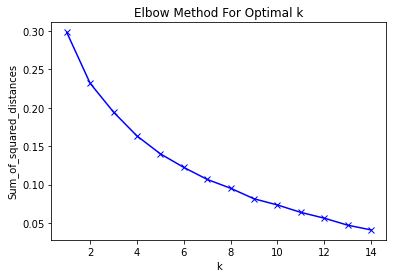

In [80]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [81]:
Silhouette_score=[]


In [82]:
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [96]:
from sklearn.metrics import silhouette_score
kclusters= 15
    #run k-means clustering
kmeans_ECL = KMeans(n_clusters=kclusters, random_state=0).fit(East_Central_London_grouped_clustering )
    #Obtains silhouette score for particular k value
score = silhouette_score(East_Central_London_grouped_clustering, kmeans_ECL.labels_, metric = 'euclidean')
    #Adds the score value to the Silhouette_score list
Silhouette_score.append(score)
print(Silhouette_score)

[0.17072620042333084, 0.18946771973437618, 0.18330762498933664, 0.19865702713901828, 0.19935178456933145, 0.19609883668819023, 0.18961874032524692, 0.18376769974820203, 0.16539920366101188, 0.16872076657817775, 0.15621171573356235, 0.14698871553415727, 0.14002954385298014, 0.14781170910740182]


In [97]:
x= [6,6,6,6,6,6,6,6,6,6,6,6,6,6]

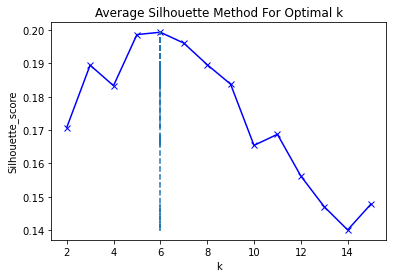

In [98]:

# Plotting the data
Max= max(Silhouette_score)
plt.plot(k, Silhouette_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('Average Silhouette Method For Optimal k')
plt.plot(x, Silhouette_score, linestyle='--') # dashed
plt.show()


Optimal  K value obtained is k= 6 from Average Silhouette Method

In [108]:
kclusters= 6
#run k-means clustering
kmeans_ECL = KMeans(n_clusters=kclusters, random_state=0).fit(East_Central_London_grouped_clustering )
# check cluster labels generated for each row in the dataframe
kmeans_ECL.labels_[0:10] 

Coverage_venues_ECL_sorted= Coverage_venues_ECL_sorted.drop(['Cluster Labels'], axis= 1)

In [109]:


# add clustering labels
Coverage_venues_ECL_sorted.insert(0, 'Cluster Labels', kmeans_ECL.labels_)

East_Central_London_merged = geo_df_ECL_merged

# Merge East_Central_London_merged with geo_merged to add latitude/longitude for each neighborhood
East_Central_London_merged =geo_df_ECL_merged.join(Coverage_venues_ECL_sorted.set_index('Coverage'), on='Coverage')

# Summary of the Cluster Obtained
East_Central_London_merged



,Postcode district,Latitude,Longitude,Easting,Northing,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EC1A,51.5203,-0.104446,531612,181856,LONDON,St Bartholomew's Hospital,"City of London, Islington",3,Coffee Shop,Pub,Beer Bar,Hotel,Wine Bar,Food Truck,French Restaurant,Burrito Place,Plaza,Gym / Fitness Center
1,EC1M,51.5214,-0.103593,531668,181980,LONDON,"Clerkenwell, Farringdon","Islington, Camden, City of London",3,Pub,Coffee Shop,Gym / Fitness Center,Food Truck,French Restaurant,Café,Falafel Restaurant,Italian Restaurant,Beer Bar,Hotel
2,EC1N,51.5200,-0.109137,531288,181815,LONDON,Hatton Garden,"Camden, City of London",3,Coffee Shop,Pub,Sandwich Place,Hotel,Sushi Restaurant,Restaurant,Food Truck,Gym / Fitness Center,Cocktail Bar,Beer Bar
3,EC1R,51.5245,-0.108978,531286,182315,LONDON,"Finsbury, Finsbury Estate (west)","Islington, Camden",3,Pub,Café,Coffee Shop,Bar,Pizza Place,Italian Restaurant,Vietnamese Restaurant,Food Truck,Hotel,French Restaurant
4,EC1V,51.5265,-0.099303,531951,182555,LONDON,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney",4,Coffee Shop,Pub,Café,Italian Restaurant,Vietnamese Restaurant,Sandwich Place,Food Truck,Breakfast Spot,Bagel Shop,Sushi Restaurant
5,EC1Y,51.5231,-0.093406,532370,182188,LONDON,"St Luke's, Bunhill Fields","Islington, City of London",4,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Pub,Café,Food Truck,Bar,Soup Place,Concert Hall,Deli / Bodega
6,EC2A,51.5231,-0.087987,532746,182197,LONDON,Shoreditch,"Islington, Hackney, City of London",2,Coffee Shop,Food Truck,Hotel,Bar,Gym / Fitness Center,Turkish Restaurant,Café,Gastropub,Cocktail Bar,Beer Bar
7,EC2M,51.5184,-0.086812,532841,181677,LONDON,"Broadgate, Liverpool Street","City of London, Tower Hamlets",1,Hotel,Gym / Fitness Center,Wine Bar,Boxing Gym,Food Truck,Sushi Restaurant,English Restaurant,Donut Shop,Chinese Restaurant,Restaurant
8,EC2N,51.5160,-0.087462,532803,181409,LONDON,"Old Broad Street, Tower 42",City of London,1,Hotel,French Restaurant,Coffee Shop,Pub,Restaurant,Sandwich Place,Indian Restaurant,Cocktail Bar,Clothing Store,Event Space
9,EC2R,51.5163,-0.091869,532496,181434,LONDON,Bank of England,City of London,5,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Restaurant,Clothing Store,Steakhouse,French Restaurant,Seafood Restaurant,Art Gallery


### Visualising the Clusters on Map

In [110]:
# create map
map_clusters_ECL = folium.Map(location=[latitude_ECL, longitude_ECL], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        East_Central_London_merged['Latitude'], 
        East_Central_London_merged['Longitude'], 
        East_Central_London_merged['Coverage'], 
        East_Central_London_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_ECL)
       
map_clusters_ECL



#### Data for Cluster 1

In [111]:
# Cluster 1

East_Central_London_merged.loc[East_Central_London_merged['Cluster Labels'] == 0, East_Central_London_merged.columns[[1] + list(range(5, East_Central_London_merged.shape[1]))]]



,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,51.5159,LONDON,Fetter Lane,"City of London, Westminster",0,Pub,Coffee Shop,Sandwich Place,Italian Restaurant,French Restaurant,Wine Bar,Burrito Place,Gym / Fitness Center,Deli / Bodega,Building
18,51.5149,LONDON,St Paul's,City of London,0,Italian Restaurant,Coffee Shop,Pub,Gym / Fitness Center,Wine Bar,Sandwich Place,Modern European Restaurant,Vietnamese Restaurant,Falafel Restaurant,Burger Joint
21,51.5126,LONDON,Blackfriars,City of London,0,Coffee Shop,Pub,Italian Restaurant,Sandwich Place,Wine Bar,Bakery,Cocktail Bar,Sushi Restaurant,Gym / Fitness Center,Salad Place
22,51.5137,LONDON,Temple,"City of London, Westminster",0,Pub,Coffee Shop,Italian Restaurant,Sandwich Place,Hotel,Wine Bar,Restaurant,History Museum,Cocktail Bar,Tea Room


#### Data for Cluster 2

In [112]:
# Cluster 2
East_Central_London_merged.loc[East_Central_London_merged['Cluster Labels'] == 1, East_Central_London_merged.columns[[1] + list(range(5, East_Central_London_merged.shape[1]))]]

,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,51.5184,LONDON,"Broadgate, Liverpool Street","City of London, Tower Hamlets",1,Hotel,Gym / Fitness Center,Wine Bar,Boxing Gym,Food Truck,Sushi Restaurant,English Restaurant,Donut Shop,Chinese Restaurant,Restaurant
8,51.5160,LONDON,"Old Broad Street, Tower 42",City of London,1,Hotel,French Restaurant,Coffee Shop,Pub,Restaurant,Sandwich Place,Indian Restaurant,Cocktail Bar,Clothing Store,Event Space
12,51.5150,LONDON,"St Mary Axe, Aldgate",City of London,1,Hotel,Coffee Shop,Cocktail Bar,Restaurant,Pizza Place,Italian Restaurant,Wine Bar,Gym / Fitness Center,Indian Restaurant,Steakhouse
13,51.5122,LONDON,"Lloyd's of London, Fenchurch Street",City of London,1,Hotel,Restaurant,Cocktail Bar,Gym / Fitness Center,Sandwich Place,Pub,Coffee Shop,Italian Restaurant,French Restaurant,English Restaurant
14,51.5127,LONDON,"Tower Hill, Tower of London","Tower Hamlets, City of London",1,Hotel,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Pub,English Restaurant,Restaurant,Garden,Cocktail Bar,Salad Place
15,51.5112,LONDON,"Monument, Billingsgate",City of London,1,Hotel,Restaurant,Coffee Shop,Pub,Cocktail Bar,Sandwich Place,Gym / Fitness Center,Asian Restaurant,French Restaurant,Italian Restaurant


#### Data for Cluster 3

In [113]:
# Cluster 3
East_Central_London_merged.loc[East_Central_London_merged['Cluster Labels'] == 2, East_Central_London_merged.columns[[1] + list(range(5, East_Central_London_merged.shape[1]))]]

,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,51.5231,LONDON,Shoreditch,"Islington, Hackney, City of London",2,Coffee Shop,Food Truck,Hotel,Bar,Gym / Fitness Center,Turkish Restaurant,Café,Gastropub,Cocktail Bar,Beer Bar
11,51.5200,LONDON,Barbican,City of London,2,Coffee Shop,Food Truck,Italian Restaurant,Gym / Fitness Center,Café,Pub,Hotel,French Restaurant,Cocktail Bar,Concert Hall


#### Data for Cluster 4

In [114]:
# Cluster 4
East_Central_London_merged.loc[East_Central_London_merged['Cluster Labels'] == 3, East_Central_London_merged.columns[[1] + list(range(5, East_Central_London_merged.shape[1]))]]

,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.5203,LONDON,St Bartholomew's Hospital,"City of London, Islington",3,Coffee Shop,Pub,Beer Bar,Hotel,Wine Bar,Food Truck,French Restaurant,Burrito Place,Plaza,Gym / Fitness Center
1,51.5214,LONDON,"Clerkenwell, Farringdon","Islington, Camden, City of London",3,Pub,Coffee Shop,Gym / Fitness Center,Food Truck,French Restaurant,Café,Falafel Restaurant,Italian Restaurant,Beer Bar,Hotel
2,51.5200,LONDON,Hatton Garden,"Camden, City of London",3,Coffee Shop,Pub,Sandwich Place,Hotel,Sushi Restaurant,Restaurant,Food Truck,Gym / Fitness Center,Cocktail Bar,Beer Bar
3,51.5245,LONDON,"Finsbury, Finsbury Estate (west)","Islington, Camden",3,Pub,Café,Coffee Shop,Bar,Pizza Place,Italian Restaurant,Vietnamese Restaurant,Food Truck,Hotel,French Restaurant


#### Data for Cluster 5

In [115]:
# Cluster 5
East_Central_London_merged.loc[East_Central_London_merged['Cluster Labels'] == 4, East_Central_London_merged.columns[[1] + list(range(5, East_Central_London_merged.shape[1]))]]

,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,51.5265,LONDON,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney",4,Coffee Shop,Pub,Café,Italian Restaurant,Vietnamese Restaurant,Sandwich Place,Food Truck,Breakfast Spot,Bagel Shop,Sushi Restaurant
5,51.5231,LONDON,"St Luke's, Bunhill Fields","Islington, City of London",4,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Pub,Café,Food Truck,Bar,Soup Place,Concert Hall,Deli / Bodega


Data for Cluster 6

In [116]:
# Cluster 6
East_Central_London_merged.loc[East_Central_London_merged['Cluster Labels'] == 5, East_Central_London_merged.columns[[1] + list(range(5, East_Central_London_merged.shape[1]))]]

,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,51.5163,LONDON,Bank of England,City of London,5,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Restaurant,Clothing Store,Steakhouse,French Restaurant,Seafood Restaurant,Art Gallery
10,51.5158,LONDON,Guildhall,City of London,5,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Burger Joint,French Restaurant,Clothing Store,Café,Scenic Lookout,Steakhouse,Plaza
16,51.5133,LONDON,"Cornhill, Gracechurch Street, Lombard Street",City of London,5,Sandwich Place,Coffee Shop,Restaurant,Pub,Gym / Fitness Center,Steakhouse,Vietnamese Restaurant,Cocktail Bar,Modern European Restaurant,Yoga Studio
19,51.5134,LONDON,Mansion House,City of London,5,Coffee Shop,Gym / Fitness Center,Sandwich Place,Italian Restaurant,French Restaurant,Wine Bar,Modern European Restaurant,Bakery,Restaurant,Steakhouse
20,51.5114,LONDON,Cannon Street,City of London,5,Coffee Shop,Gym / Fitness Center,Pub,Vietnamese Restaurant,Italian Restaurant,Clothing Store,Steakhouse,Japanese Restaurant,Sushi Restaurant,Sandwich Place


### Birmingham

###  Using K-means Algorithm to cluster the PostalCode Districts and Coverages with the categories of Venues Obtained from FourSquare API

In [117]:
# set number of cluster
kclusters_Birmingham = 2

Birmingham_grouped_clustering = Birmingham_grouped.drop('Coverage', 1)

# run k-means clustering
kmeans_Birmingham = KMeans(n_clusters=kclusters_Birmingham, random_state=0).fit(Birmingham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_Birmingham.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [118]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Birmingham_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

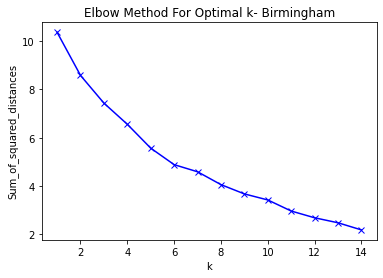

In [119]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k- Birmingham')
plt.show()

In [120]:
Silhouette_score_Birmingham= []

In [134]:
from sklearn.metrics import silhouette_score
kclusters_Birmingham= 15
# run k-means clustering
kmeans_Birmingham = KMeans(n_clusters=kclusters_Birmingham, random_state=0).fit(Birmingham_grouped_clustering)
    #Obtains silhouette score for particular k value
score = silhouette_score(Birmingham_grouped_clustering, kmeans_Birmingham.labels_, metric = 'euclidean')
    #Adds the score value to the Silhouette_score list
Silhouette_score_Birmingham.append(score)
print(Silhouette_score_Birmingham)

[0.4182021261274812, 0.2317726373508807, 0.24201569327414962, 0.15309485832300432, 0.16759229086985133, 0.17024357288289768, 0.17552900899027515, 0.1795135604118142, 0.17681561035370358, 0.14172395874300237, 0.13054537467410404, 0.13647938065822557, 0.15272978216452598, 0.12505180329897994]


In [135]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15]

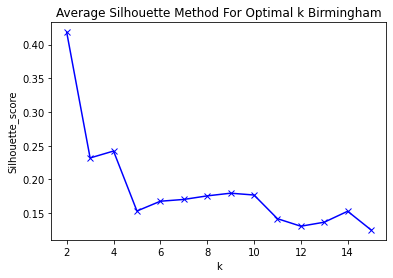

In [136]:

# Plotting the data
plt.plot(k, Silhouette_score_Birmingham, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('Average Silhouette Method For Optimal k Birmingham')
plt.show()

It can be concluded from Average Silhouette method that cluster size of 2 is optimum for Birmingham

In [137]:
# set number of cluster
kclusters_Birmingham = 2

Birmingham_grouped_clustering = Birmingham_grouped.drop('Coverage', 1)

# run k-means clustering
kmeans_Birmingham = KMeans(n_clusters=kclusters_Birmingham, random_state=0).fit(Birmingham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_Birmingham.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [144]:
#Removing clustering labels if already present
Coverage_venues_Birmingham_sorted= Coverage_venues_Birmingham_sorted.drop(['Cluster Labels'], axis = 1)

# add clustering labels
Coverage_venues_Birmingham_sorted.insert(0, 'Cluster Labels', kmeans_Birmingham.labels_)

Birmingham_merged = geo_df_Birmingham_merged

# Merge East_Central_London_merged with geo_merged to add latitude/longitude for each neighborhood
Birmingham_merged =geo_df_Birmingham_merged.join(Coverage_venues_Birmingham_sorted.set_index('Coverage'), on='Coverage')


# Summary of the Cluster Obtained
Birmingham_merged



,Postcode district,Latitude,Longitude,Easting,Northing,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B1,52.4796,-1.90779,406360,286856,BIRMINGHAM,"Birmingham City Centre, Broad Street (east)",Birmingham,1.0,Indian Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Cocktail Bar,Pub,Bar,Plaza,Café,Hotel
1,B2,52.4863,-1.89732,407070,287603,BIRMINGHAM,"Birmingham City Centre, New Street",Birmingham,1.0,Pub,Coffee Shop,Bar,Sandwich Place,Café,Grocery Store,Hotel,Chinese Restaurant,Climbing Gym,Deli / Bodega
2,B3,52.4823,-1.90289,406692,287157,BIRMINGHAM,"Birmingham City Centre, Newhall Street",Birmingham,1.0,Coffee Shop,Pub,Hotel,Indian Restaurant,Bar,Bakery,Café,Plaza,Shopping Mall,Italian Restaurant
3,B4,52.4838,-1.89374,407313,287325,BIRMINGHAM,"Birmingham City Centre, Corporation Street (no...",Birmingham,1.0,Coffee Shop,Pub,Sandwich Place,Hotel,Grocery Store,Café,Bar,Discount Store,Pizza Place,Rock Club
4,B5,52.4722,-1.89683,407105,286034,BIRMINGHAM,"Digbeth, Highgate, Lee Bank",Birmingham,1.0,Gay Bar,Chinese Restaurant,Indian Restaurant,Restaurant,Korean Restaurant,Japanese Restaurant,Music Venue,Grocery Store,Sports Bar,Coffee Shop
5,B6,52.5025,-1.88685,407778,289406,BIRMINGHAM,"Aston, Birchfield, Birmingham , Witton",Birmingham,1.0,Auto Garage,Park,Motorcycle Shop,Grocery Store,Convenience Store,Convention Center,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop
6,B7,52.4938,-1.87438,408626,288439,BIRMINGHAM,"Nechells, Vauxhall",Birmingham,1.0,Construction & Landscaping,Bar,Gym / Fitness Center,Grocery Store,Convenience Store,Escape Room,English Restaurant,Electronics Store,Doner Restaurant,Discount Store
7,B8,52.4900,-1.84277,410773,288021,BIRMINGHAM,"Washwood Heath, Ward End, Saltley",Birmingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,B9,52.4781,-1.85284,410092,286696,BIRMINGHAM,"Bordesley Green, Bordesley",Birmingham,1.0,Supermarket,Bakery,Yoga Studio,Fast Food Restaurant,Escape Room,English Restaurant,Electronics Store,Doner Restaurant,Discount Store,Dim Sum Restaurant
9,B10,52.4701,-1.85328,410064,285806,BIRMINGHAM,Small Heath,Birmingham,1.0,Café,Sandwich Place,Middle Eastern Restaurant,Gym / Fitness Center,Fast Food Restaurant,Turkish Restaurant,Indian Restaurant,Business Service,Electronics Store,Doner Restaurant


### Visualising the Clusters on Map

In [145]:
## Dropping any NaN values
Birmingham_merged.dropna(subset= ['1st Most Common Venue'], inplace= True)

# Turning Cluster Labels as integer
Birmingham_merged['Cluster Labels'] = Birmingham_merged['Cluster Labels'].astype(int)

Birmingham_merged

,Postcode district,Latitude,Longitude,Easting,Northing,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B1,52.4796,-1.90779,406360,286856,BIRMINGHAM,"Birmingham City Centre, Broad Street (east)",Birmingham,1,Indian Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Cocktail Bar,Pub,Bar,Plaza,Café,Hotel
1,B2,52.4863,-1.89732,407070,287603,BIRMINGHAM,"Birmingham City Centre, New Street",Birmingham,1,Pub,Coffee Shop,Bar,Sandwich Place,Café,Grocery Store,Hotel,Chinese Restaurant,Climbing Gym,Deli / Bodega
2,B3,52.4823,-1.90289,406692,287157,BIRMINGHAM,"Birmingham City Centre, Newhall Street",Birmingham,1,Coffee Shop,Pub,Hotel,Indian Restaurant,Bar,Bakery,Café,Plaza,Shopping Mall,Italian Restaurant
3,B4,52.4838,-1.89374,407313,287325,BIRMINGHAM,"Birmingham City Centre, Corporation Street (no...",Birmingham,1,Coffee Shop,Pub,Sandwich Place,Hotel,Grocery Store,Café,Bar,Discount Store,Pizza Place,Rock Club
4,B5,52.4722,-1.89683,407105,286034,BIRMINGHAM,"Digbeth, Highgate, Lee Bank",Birmingham,1,Gay Bar,Chinese Restaurant,Indian Restaurant,Restaurant,Korean Restaurant,Japanese Restaurant,Music Venue,Grocery Store,Sports Bar,Coffee Shop
5,B6,52.5025,-1.88685,407778,289406,BIRMINGHAM,"Aston, Birchfield, Birmingham , Witton",Birmingham,1,Auto Garage,Park,Motorcycle Shop,Grocery Store,Convenience Store,Convention Center,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop
6,B7,52.4938,-1.87438,408626,288439,BIRMINGHAM,"Nechells, Vauxhall",Birmingham,1,Construction & Landscaping,Bar,Gym / Fitness Center,Grocery Store,Convenience Store,Escape Room,English Restaurant,Electronics Store,Doner Restaurant,Discount Store
8,B9,52.4781,-1.85284,410092,286696,BIRMINGHAM,"Bordesley Green, Bordesley",Birmingham,1,Supermarket,Bakery,Yoga Studio,Fast Food Restaurant,Escape Room,English Restaurant,Electronics Store,Doner Restaurant,Discount Store,Dim Sum Restaurant
9,B10,52.4701,-1.85328,410064,285806,BIRMINGHAM,Small Heath,Birmingham,1,Café,Sandwich Place,Middle Eastern Restaurant,Gym / Fitness Center,Fast Food Restaurant,Turkish Restaurant,Indian Restaurant,Business Service,Electronics Store,Doner Restaurant
10,B11,52.4554,-1.85984,409621,284170,BIRMINGHAM,"Sparkhill, Sparkbrook, Tyseley",Birmingham,1,Gas Station,Italian Restaurant,Pakistani Restaurant,English Restaurant,Electronics Store,Doner Restaurant,Discount Store,Dim Sum Restaurant,Yoga Studio,Farmers Market


In [141]:
# create map
map_clusters_Birmingham = folium.Map(location=[latitude_Birmingham, longitude_Birmingham], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_Birmingham)
ys = [i + x + (i*x)**2 for i in range(kclusters_Birmingham)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        Birmingham_merged['Latitude'], 
        Birmingham_merged['Longitude'], 
        Birmingham_merged['Coverage'], 
        Birmingham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Birmingham)
       
map_clusters_Birmingham



#### Cluster 1 of Birmingham


In [146]:
# Cluster 1

Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 0, Birmingham_merged.columns[[1] + list(range(5, Birmingham_merged.shape[1]))]]


,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,52.4915,BIRMINGHAM,"Winson Green, Hockley",Birmingham,0,Construction & Landscaping,Yoga Studio,Fast Food Restaurant,Convenience Store,Convention Center,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
30,52.4509,BIRMINGHAM,"Woodgate, Bartley Green, Quinton, California (...",Birmingham,0,Construction & Landscaping,Yoga Studio,Fast Food Restaurant,Convenience Store,Convention Center,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant


#### Cluster 2

In [147]:
# Cluster 2

Birmingham_merged.loc[Birmingham_merged['Cluster Labels'] == 1, Birmingham_merged.columns[[1] + list(range(5, Birmingham_merged.shape[1]))]]

,Latitude,Post town,Coverage,Local authority area(s),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,52.4796,BIRMINGHAM,"Birmingham City Centre, Broad Street (east)",Birmingham,1,Indian Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Cocktail Bar,Pub,Bar,Plaza,Café,Hotel
1,52.4863,BIRMINGHAM,"Birmingham City Centre, New Street",Birmingham,1,Pub,Coffee Shop,Bar,Sandwich Place,Café,Grocery Store,Hotel,Chinese Restaurant,Climbing Gym,Deli / Bodega
2,52.4823,BIRMINGHAM,"Birmingham City Centre, Newhall Street",Birmingham,1,Coffee Shop,Pub,Hotel,Indian Restaurant,Bar,Bakery,Café,Plaza,Shopping Mall,Italian Restaurant
3,52.4838,BIRMINGHAM,"Birmingham City Centre, Corporation Street (no...",Birmingham,1,Coffee Shop,Pub,Sandwich Place,Hotel,Grocery Store,Café,Bar,Discount Store,Pizza Place,Rock Club
4,52.4722,BIRMINGHAM,"Digbeth, Highgate, Lee Bank",Birmingham,1,Gay Bar,Chinese Restaurant,Indian Restaurant,Restaurant,Korean Restaurant,Japanese Restaurant,Music Venue,Grocery Store,Sports Bar,Coffee Shop
5,52.5025,BIRMINGHAM,"Aston, Birchfield, Birmingham , Witton",Birmingham,1,Auto Garage,Park,Motorcycle Shop,Grocery Store,Convenience Store,Convention Center,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop
6,52.4938,BIRMINGHAM,"Nechells, Vauxhall",Birmingham,1,Construction & Landscaping,Bar,Gym / Fitness Center,Grocery Store,Convenience Store,Escape Room,English Restaurant,Electronics Store,Doner Restaurant,Discount Store
8,52.4781,BIRMINGHAM,"Bordesley Green, Bordesley",Birmingham,1,Supermarket,Bakery,Yoga Studio,Fast Food Restaurant,Escape Room,English Restaurant,Electronics Store,Doner Restaurant,Discount Store,Dim Sum Restaurant
9,52.4701,BIRMINGHAM,Small Heath,Birmingham,1,Café,Sandwich Place,Middle Eastern Restaurant,Gym / Fitness Center,Fast Food Restaurant,Turkish Restaurant,Indian Restaurant,Business Service,Electronics Store,Doner Restaurant
10,52.4554,BIRMINGHAM,"Sparkhill, Sparkbrook, Tyseley",Birmingham,1,Gas Station,Italian Restaurant,Pakistani Restaurant,English Restaurant,Electronics Store,Doner Restaurant,Discount Store,Dim Sum Restaurant,Yoga Studio,Farmers Market


#### City-to- city comparison